
# Taller de análisis exploratorio

Nombres:



Para poder realizar cualquier análisis usaremos siempre estas librerias para empezar


In [190]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
# Realizamos la carga de datos.
data = pd.read_csv("ventas_tienda.csv")  #archivo a analizar


### ID_Venta:Identificador único de la venta
### Producto:Nombre del producto
### Categoría: Categoría del producto (Electrónica, Ropa, Hogar, etc.)
### Precio: Precio unitario
### Cantidad: Cantidad vendida
### Fecha: Fecha de la venta
### Ciudad: Ciudad donde se realizó la venta

### Método_Pago: Tarjeta, Transferencia, Efectivo

#  Intervención de datos


### 1.- Importar el dataset y mostrar las primeras 10 filas.

In [192]:
row_10 = data.head(10)
row_10

,ID_Venta,Producto,Categoría,Precio,Cantidad,Fecha,Ciudad,Método_Pago
0,1,Celular,Electrónica,250000,1,2025-06-15,NaN,Efectivo
1,2,Silla Gamer,Hogar,120000,2,2025-01-26,Valparaíso,Transferencia
2,3,Celular,Electrónica,250000,5,2025-04-18,Santiago,Transferencia
3,4,Zapatos,Ropa,35000,1,2025-08-21,Santiago,Tarjeta
4,5,Silla Gamer,Hogar,120000,2,2025-02-23,Antofagasta,Transferencia
5,6,Auriculares,Electrónica,15000,5,2024-12-05,Valparaíso,Transferencia
6,7,Licuadora,Hogar,45000,4,2024-12-13,Valparaíso,Efectivo
7,8,Televisor,Electrónica,300000,3,2024-09-17,Santiago,Tarjeta
8,9,Zapatos,Ropa,35000,3,2025-05-09,Concepción,Tarjeta
9,10,Silla Gamer,Hogar,120000,3,2025-02-24,Santiago,Tarjeta


### 2.- Revisar el tipo de datos de cada columna

In [193]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print('Hay {} columnas numéricas y {} columnas categóricas'.format(numeric_data.shape[1], categorical_data.shape[1]))
print("Columnas Numericas:\n", numeric_data.columns)
print("\nColumnas Categoricas:\n", categorical_data.columns)

Hay 3 columnas numéricas y 5 columnas categóricas
Columnas Numericas:
 Index(['ID_Venta', 'Precio', 'Cantidad'], dtype='object')

Columnas Categoricas:
 Index(['Producto', 'Categoría', 'Fecha', 'Ciudad', 'Método_Pago'], dtype='object')


In [194]:
data_type = data.info()
data_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Venta     500 non-null    int64 
 1   Producto     500 non-null    object
 2   Categoría    500 non-null    object
 3   Precio       500 non-null    int64 
 4   Cantidad     500 non-null    int64 
 5   Fecha        500 non-null    object
 6   Ciudad       408 non-null    object
 7   Método_Pago  500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


# Limpieza de datos

### 1.- Identificar valores nulos en las columnas.


In [195]:
obejct_col = data.select_dtypes(include=['object']).columns
for col in obejct_col:
    if col == 'Fecha':
        continue
    uniques = data[col].unique()
    print(f"Columna {col}\n tiene los siguientes valores únicos: {uniques}\n")

Columna Producto
 tiene los siguientes valores únicos: ['Celular' 'Silla Gamer' 'Zapatos' 'Auriculares' 'Licuadora' 'Televisor'
 'Polera' 'Escritorio' 'Camisa' 'Cargador']

Columna Categoría
 tiene los siguientes valores únicos: ['Electrónica' 'Hogar' 'Ropa']

Columna Ciudad
 tiene los siguientes valores únicos: [nan 'Valparaíso' 'Santiago' 'Antofagasta' 'Concepción' 'La Serena']

Columna Método_Pago
 tiene los siguientes valores únicos: ['Efectivo' 'Transferencia' 'Tarjeta']



In [196]:
columns_isnull = data.columns[data.isnull().any()]
columns_isnull

Index(['Ciudad'], dtype='object')

In [197]:
na = pd.isna(data)
na.sum()

ID_Venta        0
Producto        0
Categoría       0
Precio          0
Cantidad        0
Fecha           0
Ciudad         92
Método_Pago     0
dtype: int64

In [198]:
for columns_isnull in data:
    if data[columns_isnull].isnull().sum() > 0:
        print(f'Columna {columns_isnull} tiene {data[columns_isnull].isnull().sum()} valores nulos')
missing_values = data[columns_isnull].isnull().sum()

Columna Ciudad tiene 92 valores nulos


In [199]:
missing = data.isnull().sum()/len(data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Ciudad    0.184
dtype: float64

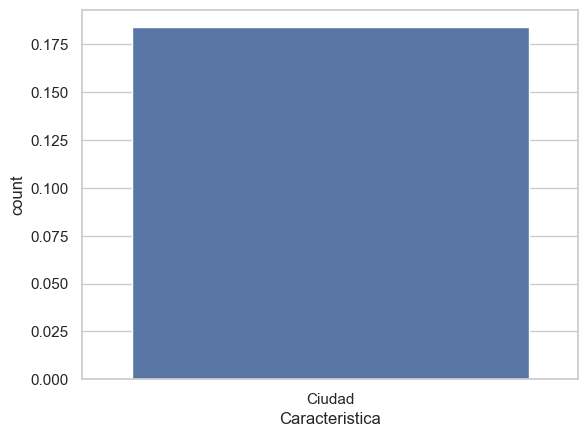

In [200]:
missing_barplot = missing.to_frame()
missing_barplot.columns = ['count']
missing_barplot['Caracteristica'] = missing.index
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="Caracteristica", y="count", data=missing_barplot)
plt.show()

### 2.- Reemplazar valores nulos de Ciudad por "Desconocida".


In [201]:
data.fillna('Desconocida', inplace=True)

In [202]:
na = pd.isna(data)
na.sum()

ID_Venta       0
Producto       0
Categoría      0
Precio         0
Cantidad       0
Fecha          0
Ciudad         0
Método_Pago    0
dtype: int64

In [203]:
data['Ciudad'].unique()

array(['Desconocida', 'Valparaíso', 'Santiago', 'Antofagasta',
       'Concepción', 'La Serena'], dtype=object)

### 3.- Corregir posibles errores en Método_Pago (ej: "tarjeta" → "Tarjeta").

In [204]:
data['Método_Pago'].unique()

array(['Efectivo', 'Transferencia', 'Tarjeta'], dtype=object)

In [205]:
for col in ['Método_Pago']:
    data[col] = data[col].str.capitalize()

In [206]:
data['Método_Pago'].unique()

array(['Efectivo', 'Transferencia', 'Tarjeta'], dtype=object)

# Transformaciones


### 1.- Crear una nueva columna Total_Venta = Precio * Cantidad.


In [207]:
data.insert(5, 'Total_Venta', data['Precio'] * data['Cantidad'])
data.head(3)

,ID_Venta,Producto,Categoría,Precio,Cantidad,Total_Venta,Fecha,Ciudad,Método_Pago
0,1,Celular,Electrónica,250000,1,250000,2025-06-15,Desconocida,Efectivo
1,2,Silla Gamer,Hogar,120000,2,240000,2025-01-26,Valparaíso,Transferencia
2,3,Celular,Electrónica,250000,5,1250000,2025-04-18,Santiago,Transferencia


### 2.- Convertir la columna Fecha al tipo datetime.

In [208]:
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID_Venta     500 non-null    int64         
 1   Producto     500 non-null    object        
 2   Categoría    500 non-null    object        
 3   Precio       500 non-null    int64         
 4   Cantidad     500 non-null    int64         
 5   Total_Venta  500 non-null    int64         
 6   Fecha        500 non-null    datetime64[ns]
 7   Ciudad       500 non-null    object        
 8   Método_Pago  500 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 35.3+ KB


In [209]:
data['Fecha'].head(3)

0   2025-06-15
1   2025-01-26
2   2025-04-18
Name: Fecha, dtype: datetime64[ns]

### 3.- Extraer Mes y Año desde la columna Fecha.

In [210]:
# mover Fecha columna de ubicación
data.insert(0, 'Fecha', data.pop('Fecha'))
data.insert(1, 'Año', data['Fecha'].dt.year)
data.insert(2, 'Mes', data['Fecha'].dt.month)
data.head(3)

,Fecha,Año,Mes,ID_Venta,Producto,Categoría,Precio,Cantidad,Total_Venta,Ciudad,Método_Pago
0,2025-06-15,2025,6,1,Celular,Electrónica,250000,1,250000,Desconocida,Efectivo
1,2025-01-26,2025,1,2,Silla Gamer,Hogar,120000,2,240000,Valparaíso,Transferencia
2,2025-04-18,2025,4,3,Celular,Electrónica,250000,5,1250000,Santiago,Transferencia


# Codificación de datos

####  1.- Aplicar Label Encoding a la columna Categoría.


In [211]:
# Aplicar Label Encoding a la columna Categoría.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.insert(5, 'Producto_le', le.fit_transform(data['Producto']))
data.insert(7, 'Categoría_le', le.fit_transform(data['Categoría']))
data.insert(12, 'Ciudad_le', le.fit_transform(data['Ciudad']))
data.insert(14, 'Método_Pago_le', le.fit_transform(data['Método_Pago']))
data.head(3)

,Fecha,Año,Mes,ID_Venta,Producto,Producto_le,Categoría,Categoría_le,Precio,Cantidad,Total_Venta,Ciudad,Ciudad_le,Método_Pago,Método_Pago_le
0,2025-06-15,2025,6,1,Celular,3,Electrónica,0,250000,1,250000,Desconocida,2,Efectivo,0
1,2025-01-26,2025,1,2,Silla Gamer,7,Hogar,1,120000,2,240000,Valparaíso,5,Transferencia,2
2,2025-04-18,2025,4,3,Celular,3,Electrónica,0,250000,5,1250000,Santiago,4,Transferencia,2


### 2.- Aplicar One-Hot Encoding a la columna Método_Pago.

In [212]:
# Aplicar One-Hot Encoding a la columna Método_Pago
from sklearn.preprocessing import OneHotEncoder
# Crear instancias de OneHotEncoder para cada columna categórica
prod_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ciu_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
met_ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Ajustar y transformar los datos
producto_ohe = prod_ohe.fit_transform(data[['Producto']])
categoria_ohe = cat_ohe.fit_transform(data[['Categoría']])
ciudad_ohe = ciu_ohe.fit_transform(data[['Ciudad']])
metodo_ohe = met_ohe.fit_transform(data[['Método_Pago']])
# Combinar los arrays One-Hot Encoding en un solo DataFrame
ohe_arr = np.hstack((producto_ohe, categoria_ohe, ciudad_ohe, metodo_ohe))
ohe_cols = (list(prod_ohe.get_feature_names_out(['Producto'])) +
            list(cat_ohe.get_feature_names_out(['Categoría'])) +
            list(ciu_ohe.get_feature_names_out(['Ciudad'])) +
            list(met_ohe.get_feature_names_out(['Método_Pago'])))
# Crear DataFrame con las columnas One-Hot Encoding
data_ohe = pd.DataFrame(ohe_arr, columns=ohe_cols)
data_enc = pd.concat([data, data_ohe], axis=1)
# Eliminar columnas originales
data_enc.drop(columns=['Producto', 'Categoría', 'Ciudad', 'Método_Pago'], inplace=True)
data_enc.head(3)

,Fecha,Año,Mes,ID_Venta,Producto_le,Categoría_le,Precio,Cantidad,Total_Venta,Ciudad_le,...,Categoría_Ropa,Ciudad_Antofagasta,Ciudad_Concepción,Ciudad_Desconocida,Ciudad_La Serena,Ciudad_Santiago,Ciudad_Valparaíso,Método_Pago_Efectivo,Método_Pago_Tarjeta,Método_Pago_Transferencia
0,2025-06-15,2025,6,1,3,0,250000,1,250000,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2025-01-26,2025,1,2,7,1,120000,2,240000,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2025-04-18,2025,4,3,3,0,250000,5,1250000,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [213]:
data.head(3)

,Fecha,Año,Mes,ID_Venta,Producto,Producto_le,Categoría,Categoría_le,Precio,Cantidad,Total_Venta,Ciudad,Ciudad_le,Método_Pago,Método_Pago_le
0,2025-06-15,2025,6,1,Celular,3,Electrónica,0,250000,1,250000,Desconocida,2,Efectivo,0
1,2025-01-26,2025,1,2,Silla Gamer,7,Hogar,1,120000,2,240000,Valparaíso,5,Transferencia,2
2,2025-04-18,2025,4,3,Celular,3,Electrónica,0,250000,5,1250000,Santiago,4,Transferencia,2


# Análisis simple



### ¿Cuál fue la categoría con más ventas en cantidad?


In [218]:
cant_ventas_cat = data['Categoría'].value_counts()
cant_ventas_cat

Categoría
Electrónica    198
Ropa           156
Hogar          146
Name: count, dtype: int64

<Axes: title={'center': 'Ventas por Categoría'}, ylabel='count'>

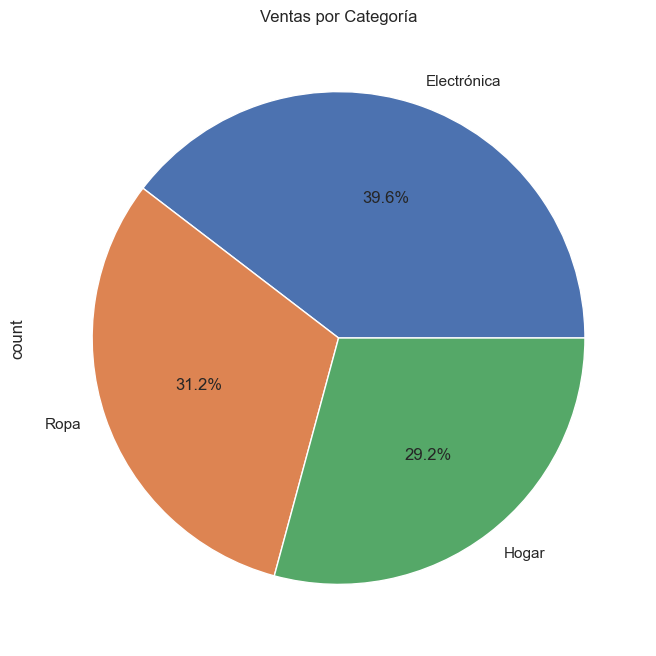

In [215]:
cant_ventas_cat.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Ventas por Categoría')

### ¿Qué ciudad generó más ingresos totales?


In [216]:
total_ventas_ciudad = data.groupby('Ciudad')['Total_Venta'].sum().sort_values(ascending=False)
total_ventas_ciudad

Ciudad
Desconocida    29661000
Santiago       26649000
Concepción     24360000
La Serena      23827000
Valparaíso     22369000
Antofagasta    20610000
Name: Total_Venta, dtype: int64

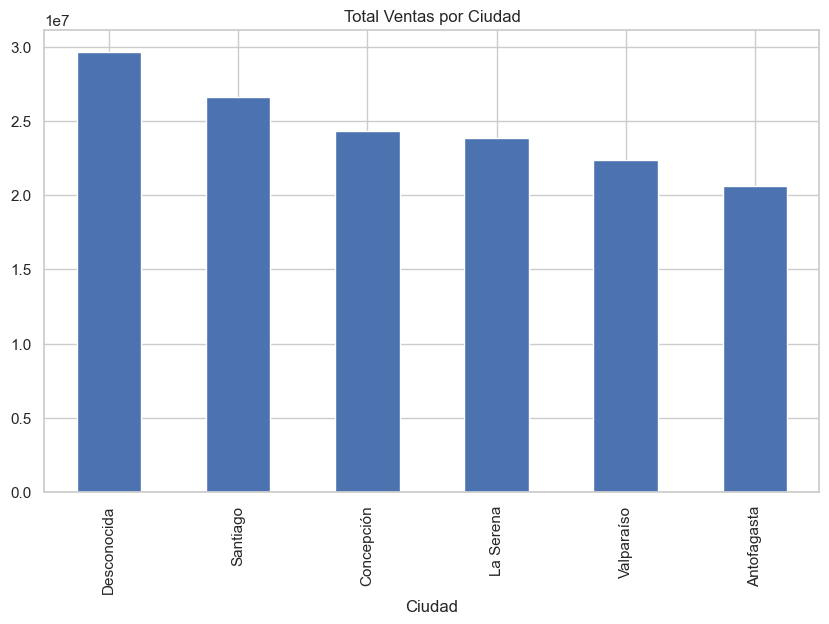

In [217]:
data.total_ventas_ciudad = total_ventas_ciudad.plot(kind='bar', figsize=(10, 6), title='Total Ventas por Ciudad')

### ¿Cuál es el método de pago más usado?

In [220]:
cantidad_metodo_pago = data['Método_Pago'].value_counts()
cantidad_metodo_pago

Método_Pago
Transferencia    169
Tarjeta          169
Efectivo         162
Name: count, dtype: int64

<Axes: title={'center': 'Cantidad por Método de Pago'}, ylabel='count'>

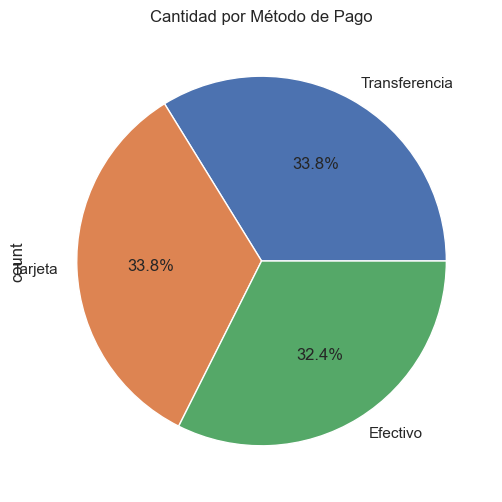

In [243]:
cantidad_metodo_pago.plot(kind='pie', figsize=(8, 6), title='Cantidad por Método de Pago', autopct='%1.1f%%')



* El trabajo debe ser desarrollado y enviado al correo j.guzman@profesor.duoc.cl